In [2]:
import numpy as np
np.random.seed(1337)

from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt

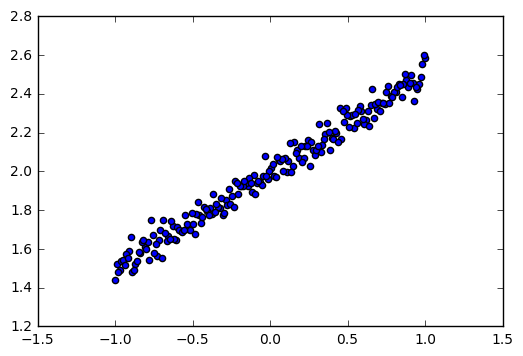

In [4]:
# create some data
X = np.linspace(-1, 1, 200)
np.random.shuffle(X)    # randomize the data
Y = 0.5 * X + 2 + np.random.normal(0, 0.05, (200, ))
# plot data
plt.scatter(X, Y)
plt.show()
X_train, Y_train = X[:160], Y[:160]     # first 160 data points
X_test, Y_test = X[160:], Y[160:]       # last 40 data points

In [5]:
# build a neural network from the 1st layer to the last layer
model=Sequential()
model.add(Dense(output_dim=1,input_dim=1))

D:\PY\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(units=1, input_dim=1)`
  app.launch_new_instance()


In [6]:
# choose loss function and optimizing method
model.compile(loss='mse',optimizer='sgd')

In [7]:
# training
print('Training -----------')
for step in range(301):
    cost=model.train_on_batch(X_train,Y_train)
    if step%100==0:
        print('train cost',cost)
    

Training -----------
train cost 4.21153
train cost 0.130966
train cost 0.0187089
train cost 0.00607735


In [8]:
# test
print('\nTesting ------------')
cost=model.evaluate(X_test,Y_test,batch_size=40)#把剩下的40个测试机全部丢进去
W,b=model.layers[0].get_weights()

print('test cost:',cost)
print('Weights=',W,'\nbiases=',b)



Testing ------------
40/40 [==============================] - 0s
test cost: 0.00873668678105
Weights= [[ 0.61854488]] 
biases= [ 1.9926883]


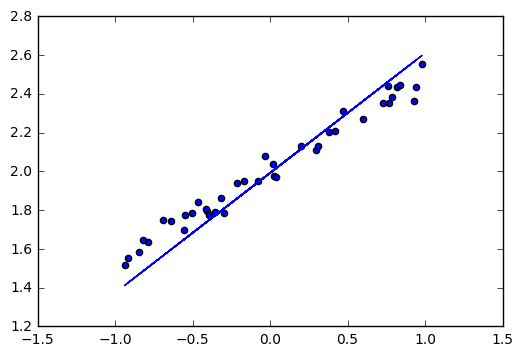

In [9]:
# plotting the prediction
Y_pred = model.predict(X_test)
plt.scatter(X_test, Y_test)
plt.plot(X_test, Y_pred)
plt.show()